## Importing Necessary Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Analysis

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_task2.csv")

In [4]:
#Loading Cleaned and Normalized Data
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,Low Fat,0.172914,Snack Foods,0.777729,OUT013,1987,High,Tier 3,Supermarket Type1,0.210293
8519,FDS36,0.227746,Regular,0.143069,Baking Goods,0.326263,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.039529
8520,NCJ29,0.359929,Low Fat,0.107148,Health and Hygiene,0.228492,OUT035,2004,Small,Tier 2,Supermarket Type1,0.088850
8521,FDN46,0.158083,Regular,0.442219,Snack Foods,0.304939,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.138835


In [5]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [6]:
#creating a dataframe with numericals Column
numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
df_with_numerical_value = df[numerical_columns]

In [7]:
df_with_numerical_value

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,0.283587
1,0.081274,0.058705,0.072068,0.031419
2,0.770765,0.051037,0.468288,0.158115
3,0.871986,0.000000,0.640093,0.053555
4,0.260494,0.000000,0.095805,0.073651
...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.210293
8519,0.227746,0.143069,0.326263,0.039529
8520,0.359929,0.107148,0.228492,0.088850
8521,0.158083,0.442219,0.304939,0.138835


<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

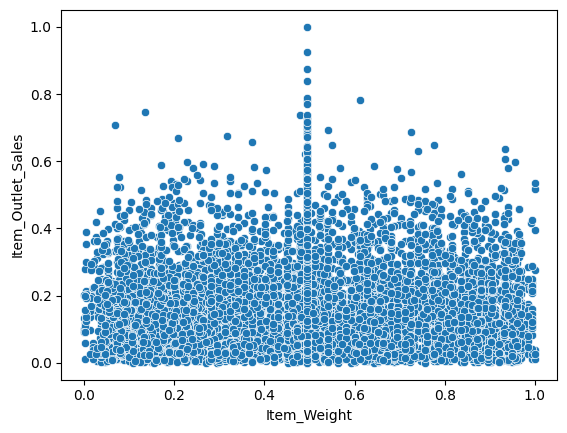

In [8]:
# Scatter plot
sns.scatterplot(data=df_with_numerical_value, x='Item_Weight', y='Item_Outlet_Sales')

In [9]:
#3-d plot
fig = px.scatter_3d(df_with_numerical_value, x='Item_MRP', y='Item_Weight', z='Item_Outlet_Sales')
fig.show()

In [10]:
#finding correlataion
df_with_numerical_value.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


### So, Here Only Item_MRP and Item_Outlet_sales is related

## Linear Regresion

In [11]:
# import packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

In [12]:
# Select the feature matrix (X) and target variable (y)
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
y = df['Item_Outlet_Sales']

In [13]:
# Split the data into training and testing sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)

In [15]:
predictions

array([0.10515691, 0.0474698 , 0.05548439, ..., 0.05551813, 0.03233671,
       0.13212031])

In [16]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.010520185592047846
mean_absolute_error :  0.0762060528098998


In [17]:
#model intercept and coefficien Value
model.coef_,model.intercept_

(array([-0.00361767, -0.11252536,  0.28034366]), 0.058984727220769986)

## Encoding of the Categorical Columns

### Data Cleaning

In [42]:
#creating a dataframe with numericals Column
categorical_columns = ['Item_Weight','Item_Visibility','Item_MRP',	'Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']
categorical_df = df[categorical_columns]

In [43]:
categorical_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,Low Fat,Dairy,OUT049,1999,Medium,0.283587
1,0.081274,0.058705,0.072068,Regular,Soft Drinks,OUT018,2009,Medium,0.031419
2,0.770765,0.051037,0.468288,Low Fat,Meat,OUT049,1999,Medium,0.158115
3,0.871986,0.000000,0.640093,Regular,Fruits and Vegetables,OUT010,1998,Medium,0.053555
4,0.260494,0.000000,0.095805,Low Fat,Household,OUT013,1987,High,0.073651
...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,Low Fat,Snack Foods,OUT013,1987,High,0.210293
8519,0.227746,0.143069,0.326263,Regular,Baking Goods,OUT045,2002,Medium,0.039529
8520,0.359929,0.107148,0.228492,Low Fat,Health and Hygiene,OUT035,2004,Small,0.088850
8521,0.158083,0.442219,0.304939,Regular,Snack Foods,OUT018,2009,Medium,0.138835


In [62]:
df1 = categorical_df

In [44]:
categorical_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [45]:
# Replace variations of the same category with a consistent representation
categorical_df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Verify the unique values after cleaning
categorical_df['Item_Fat_Content'].unique()

<ipython-input-45-8f2fadda5c2b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Low Fat', 'Regular'], dtype=object)

In [46]:
categorical_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### 1. Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()
categorical_df['Item_Fat_Content_LabelEncoding'] = encoder.fit_transform(categorical_df['Item_Fat_Content'])
categorical_df['Item_Type_LabelEncoding'] = encoder.fit_transform(categorical_df['Item_Type'])
categorical_df['Outlet_Identifier_LabelEncoding'] = encoder.fit_transform(categorical_df['Outlet_Identifier'])
categorical_df['Outlet_Establishment_Year_LabelEncoding'] = encoder.fit_transform(categorical_df['Outlet_Establishment_Year'])
categorical_df['Outlet_Size_LabelEncoding'] = encoder.fit_transform(categorical_df['Outlet_Size'])

<ipython-input-47-0fed4a5edb9c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-0fed4a5edb9c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
categorical_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_LabelEncoding,Item_Type_LabelEncoding,Outlet_Identifier_LabelEncoding,Outlet_Establishment_Year_LabelEncoding,Outlet_Size_LabelEncoding
0,0.282525,0.048866,0.927507,Low Fat,Dairy,OUT049,1999,Medium,0.283587,0,4,9,4,1
1,0.081274,0.058705,0.072068,Regular,Soft Drinks,OUT018,2009,Medium,0.031419,1,14,3,8,1
2,0.770765,0.051037,0.468288,Low Fat,Meat,OUT049,1999,Medium,0.158115,0,10,9,4,1
3,0.871986,0.000000,0.640093,Regular,Fruits and Vegetables,OUT010,1998,Medium,0.053555,1,6,0,3,1
4,0.260494,0.000000,0.095805,Low Fat,Household,OUT013,1987,High,0.073651,0,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,Low Fat,Snack Foods,OUT013,1987,High,0.210293,0,13,1,1,0
8519,0.227746,0.143069,0.326263,Regular,Baking Goods,OUT045,2002,Medium,0.039529,1,0,7,5,1
8520,0.359929,0.107148,0.228492,Low Fat,Health and Hygiene,OUT035,2004,Small,0.088850,0,8,6,6,2
8521,0.158083,0.442219,0.304939,Regular,Snack Foods,OUT018,2009,Medium,0.138835,1,13,3,8,1


In [49]:
# Select the feature matrix (X) and target variable (y)
X = categorical_df[['Item_Weight','Item_Visibility','Item_MRP','Item_Fat_Content_LabelEncoding', 'Item_Type_LabelEncoding', 'Outlet_Identifier_LabelEncoding','Outlet_Establishment_Year_LabelEncoding','Outlet_Size_LabelEncoding']]
y = categorical_df['Item_Outlet_Sales']

In [50]:
# Split the data into training and testing sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)


In [51]:
predictions

array([0.11306193, 0.0471415 , 0.11651679, ..., 0.07036909, 0.0274383 ,
       0.1640273 ])

In [52]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.009717244014746763
mean_absolute_error :  0.07416208421889546


In [53]:
#model intercept and coefficien Value
model.coef_,model.intercept_

(array([-3.40821038e-03, -7.99997441e-02,  2.80639312e-01,  5.54597712e-03,
         1.64392182e-05,  1.20968356e-02, -7.86047713e-04, -4.82448633e-02]),
 0.052709946624097795)

In [59]:
y_test

7503    0.130980
2957    0.024788
7031    0.026369
1084    0.440120
856     0.178007
          ...   
7205    0.227583
3257    0.065694
6346    0.045649
6318    0.016832
6339    0.072274
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [57]:
predictions

array([0.11306193, 0.0471415 , 0.11651679, ..., 0.07036909, 0.0274383 ,
       0.1640273 ])

### 2. One Hot Encoding

In [68]:
df_encoded = pd.get_dummies(df1, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size'], drop_first=True)
df_encoded

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LabelEncoding,Item_Type_LabelEncoding,Outlet_Identifier_LabelEncoding,Outlet_Establishment_Year_LabelEncoding,Outlet_Size_LabelEncoding,Item_Fat_Content_Regular,...,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small
0,0.282525,0.048866,0.927507,0.283587,0,4,9,4,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0.081274,0.058705,0.072068,0.031419,1,14,3,8,1,1,...,0,0,0,0,0,0,0,1,1,0
2,0.770765,0.051037,0.468288,0.158115,0,10,9,4,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.871986,0.000000,0.640093,0.053555,1,6,0,3,1,1,...,0,0,1,0,0,0,0,0,1,0
4,0.260494,0.000000,0.095805,0.073651,0,9,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.210293,0,13,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8519,0.227746,0.143069,0.326263,0.039529,1,0,7,5,1,1,...,0,0,0,0,1,0,0,0,1,0
8520,0.359929,0.107148,0.228492,0.088850,0,8,6,6,2,0,...,0,0,0,0,0,1,0,0,0,1
8521,0.158083,0.442219,0.304939,0.138835,1,13,3,8,1,1,...,0,0,0,0,0,0,0,1,1,0


In [70]:
df_encoded.drop(['Item_Fat_Content_LabelEncoding', 'Item_Type_LabelEncoding', 'Outlet_Identifier_LabelEncoding','Outlet_Establishment_Year_LabelEncoding','Outlet_Size_LabelEncoding'],axis=1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small
0,0.282525,0.048866,0.927507,0.283587,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0.081274,0.058705,0.072068,0.031419,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.770765,0.051037,0.468288,0.158115,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.871986,0.000000,0.640093,0.053555,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.260494,0.000000,0.095805,0.073651,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.210293,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8519,0.227746,0.143069,0.326263,0.039529,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8520,0.359929,0.107148,0.228492,0.088850,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8521,0.158083,0.442219,0.304939,0.138835,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [71]:
# Select the feature matrix (X) and target variable (y)]
X = df_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = df_encoded['Item_Outlet_Sales']

In [72]:
# Split the data into training and testing sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)

In [73]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.0067109851188975915
mean_absolute_error :  0.060674463416885614
